<h2 align='center'> MÔN HỌC: KỸ NGHỆ TRI THỨC VÀ HỌC MÁY (7080510) </h2>

---

* Họ tên sinh viên: Nguyễn Thành Long
* Mã sinh viên: 1821050129
* Lớp/Nhóm môn học: DCCTKH63A/ 01
* Email:longtc9c2000@gmail.com

---

# THỰC HÀNH SỐ 8: THUẬT TOÁN NAIVE BAYES
---
Sinh viên tìm hiểu và thực hiện theo hướng dẫn của bài toán lọc Email mục 3.3 bài 32 trang học máy cơ bản của Vũ Hữu Tiệp:  https://machinelearningcoban.com/2017/08/08/nbc/

<img src = 'Pic/Email.png' width='400px'>



- tập dữ liệu đã được xử lý và lưu vào các file .txt, bây giờ ta chỉ cần gọi ra và cài đặt mô hình học máy lọc spam Email.


### Gọi tập dữ liệu train và test đã qua xử lý
Mỗi file *labels*.txt chứa nhiều dòng, mỗi dòng là một ký tự 0 hoặc 1 thể hiện email là non-spam hoặc spam.
Mỗi file *features*.txt chứa nhiều dòng, mỗi dòng có 3 số
________________
ví dụ:
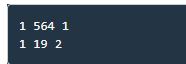
trong đó số đầu tiên là chỉ số của email, bắt đầu từ 1; số thứ hai là thứ tự của từ trong từ điển (tổng cộng 2500 từ); số thứ ba là số lượng của từ đó trong email đang xét. Dòng đầu tiên nói rằng trong email thứ nhất, từ thứ 564 trong từ điển xuất hiện 1 lần. Cách lưu dữ liệu như thế này giúp tiết kiệm bộ nhớ vì 1 email thường không chứa hết tất cả các từ trong từ điển mà chỉ chứa một lượng nhỏ, ta chỉ cần lưu các giá trị khác không.

In [1]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}
from __future__ import division, print_function, unicode_literals
import numpy as np
from scipy.sparse import coo_matrix # for sparse matrix
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score # for evaluating results

# data path and file name 
path = 'data/ex6DataPrepared/'
train_data_fn = 'train-features.txt'
test_data_fn = 'test-features.txt'
train_label_fn = 'train-labels.txt'
test_label_fn = 'test-labels.txt'

Hàm số đọc dữ liệu từ file data_fn với labels tương ứng label_fn. Chú ý rằng số lượng từ trong từ điển là 2500.

In [2]:
#Dữ liệu sẽ được lưu trong một ma trận mà mỗi hàng thể hiện một email. 
#Ma trận này là một ma trận sparse nên chúng ta sẽ sử dụng hàm scipy.sparse.coo_matrix.
nwords = 2500 

def read_data(data_fn, label_fn):
    ## read label_fn
    with open(path + label_fn) as f:
        content = f.readlines()
    label = [int(x.strip()) for x in content]

    ## read data_fn
    with open(path + data_fn) as f:
        content = f.readlines()
    # remove '\n' at the end of each line
    content = [x.strip() for x in content] 

    dat = np.zeros((len(content), 3), dtype = int)
    
    for i, line in enumerate(content): 
        a = line.split(' ')
        dat[i, :] = np.array([int(a[0]), int(a[1]), int(a[2])])
    
    # remember to -1 at coordinate since we're in Python
    # check this: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html
    # for more information about coo_matrix function 
    data = coo_matrix((dat[:, 2], (dat[:, 0] - 1, dat[:, 1] - 1)),\
             shape=(len(label), nwords))
    return (data, label)

In [3]:
#Đọc training data và test data.
#sử dụng class MultinomialNB trong sklearn để xây dựng mô hình và dự đoán đầu ra cho test data.
(train_data, train_label)  = read_data(train_data_fn, train_label_fn)
(test_data, test_label)  = read_data(test_data_fn, test_label_fn)

clf = MultinomialNB()
clf.fit(train_data, train_label)

y_pred = clf.predict(test_data)
print('Training size = %d, accuracy = %.2f%%' % \
      (train_data.shape[0],accuracy_score(test_label, y_pred)*100))

Training size = 700, accuracy = 98.08%


- tỷ lệ dự đoán đúng: 98,08%

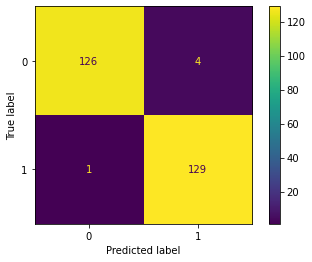

In [5]:
#Hiển thị confusion matrix:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, test_data, test_label)  
plt.show()

In [6]:
#bây giờ ta sẽ thử với tập dữ liệu trainning nhỏ hơn
train_data_fn1 = 'train-features-100.txt'
train_label_fn1 = 'train-labels-100.txt'
test_data_fn1 = 'test-features.txt'
test_label_fn1 = 'test-labels.txt'

(train_data1, train_label1)  = read_data(train_data_fn1, train_label_fn1)
(test_data1, test_label1)  = read_data(test_data_fn1, test_label_fn1)
clf = MultinomialNB()
clf.fit(train_data1, train_label1)
y_pred1 = clf.predict(test_data1)
print('Training size = %d, accuracy = %.2f%%' % \
      (train_data1.shape[0],accuracy_score(test_label1, y_pred1)*100))

Training size = 100, accuracy = 97.69%


- tỷ lệ dự đoán đúng là 97,69% cũng khá cao.

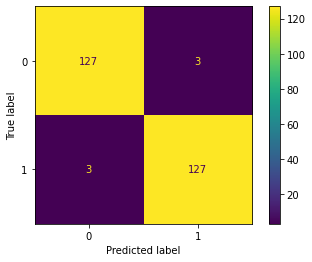

In [7]:
#Hiển thị confusion matrix:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, test_data1, test_label1)  
plt.show()

xủ lý các emails spam với ngôn ngữ tự nhiên với mô hình học máy MultinomialNB cho ra tỷ lệ dự đoán đúng rất cao.